In [2]:
from torch.utils.data import DataLoader
import torchvision.transforms as T
import matplotlib.pyplot as plt 

from utils.dataset import IOSMapDataset, IOSQueryDataset, IOSNeighborPairs, \
                        build_retrieval_loaders, collate_map, collate_query
                        

# data usage 

## spot 

### map 

In [2]:
root = "/media/jbhayet/Data/datasets/crocodl-dataset/capture/HYDRO/sessions"  # contains ios_map/ and ios_query/
tfm = T.Compose([T.Resize((480, 640)), T.ToTensor()])

# map_ds = SpotMapDataset(root, transform=tfm, subsession="spot_2023-11-24-11-26")

In [6]:
from pathlib import Path 
("/media/jbhayet/Data/datasets/crocodl-dataset/capture/HYDRO/sessions").split("/")[-2]


'HYDRO'

In [3]:
root = "/media/jbhayet/Data/datasets/crocodl-dataset/capture/HYDRO/sessions"  # contains ios_map/ and ios_query/
tfm = T.Compose([T.Resize((480, 640)), T.ToTensor()])  # or your own

# 1) Mapping / BA (poses + intrinsics)
map_ds = IOSMapDataset(root, transform=tfm, subsession="ios_2023-10-27_10.20.23_000")
map_loader = DataLoader(map_ds, batch_size=4, shuffle=False, collate_fn=collate_map)
map_batch = next(iter(map_loader))

imgs = map_batch["image"]      # (B,3,H,W)
K = map_batch["K"]             # (B,3,3)
Twc_list = map_batch["Twc"]    # list of 4x4 or None
split = map_batch["split"]
subsession = map_batch["subsession"]
timestamp = map_batch["timestamp"]
sensor_id = map_batch["sensor_id"]
path = map_batch["path"]

# 3) VO / relative-pose pairs within a subsession
pairs = IOSNeighborPairs(map_ds, stride=1)
pair_loader = DataLoader(pairs, batch_size=1, shuffle=False)

In [4]:
map_ds[0].keys()

dict_keys(['split', 'subsession', 'timestamp', 'dev_id', 'img_sensor', 'Twc', 'Tcw', 'cov6x6'])

In [5]:
map_ds[0]["Twc"]

tensor([[-5.0449e-01, -8.6338e-01, -7.7719e-03,  1.1806e+00],
        [ 8.6341e-01, -5.0451e-01,  4.9332e-04,  1.9804e+01],
        [-4.3469e-03, -6.4614e-03,  9.9997e-01, -1.1813e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)

In [6]:
map_ds[0]["img_sensor"].keys()

dict_keys(['spot_2023-11-24-11-26/spot-camera-frontleft-image', 'spot_2023-11-24-11-26/spot-camera-frontright-image', 'spot_2023-11-24-11-26/spot-camera-left-image', 'spot_2023-11-24-11-26/spot-camera-right-image'])

In [7]:
print(map_ds[0]["img_sensor"]['spot_2023-11-24-11-26/spot-camera-frontleft-image'].Trs)
print(map_ds[0]["img_sensor"]['spot_2023-11-24-11-26/spot-camera-frontleft-image'].Tsw)

tensor([[-0.4681, -0.4115,  0.7820,  0.3834],
        [-0.8603,  0.0102, -0.5097,  0.0341],
        [ 0.2018, -0.9114, -0.3588, -0.0445],
        [ 0.0000,  0.0000,  0.0000,  1.0000]], dtype=torch.float64)
tensor([[  0.9774,   0.0300,   0.2093,  -1.5045],
        [  0.2059,  -0.3609,  -0.9096,   6.9127],
        [  0.0483,   0.9321,  -0.3589, -18.8576],
        [  0.0000,   0.0000,   0.0000,   1.0000]], dtype=torch.float64)


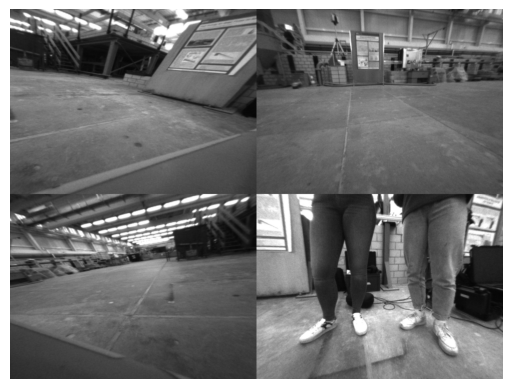

In [8]:
img_fl = map_ds[0]["img_sensor"]['spot_2023-11-24-11-26/spot-camera-frontleft-image'].img.permute(1, 2, 0)
img_fr = map_ds[0]["img_sensor"]['spot_2023-11-24-11-26/spot-camera-frontright-image'].img.permute(1, 2, 0)
img_l = map_ds[0]["img_sensor"]['spot_2023-11-24-11-26/spot-camera-left-image'].img.permute(1, 2, 0)
img_r = map_ds[0]["img_sensor"]['spot_2023-11-24-11-26/spot-camera-right-image'].img.permute(1, 2, 0)

snapshot = torch.cat(
    [torch.cat([img_fl, img_fr]), torch.cat([img_l, img_r])], dim=1
)

plt.imshow(snapshot); plt.axis("off")
plt.show()

### query 

In [35]:
root = "/media/jbhayet/Data/datasets/crocodl-dataset/capture/HYDRO/sessions"  # contains ios_map/ and ios_query/
tfm = T.Compose([T.Resize((480, 640)), T.ToTensor()])

map_ds = SpotQueryDataset(root, transform=tfm, subsession="spot_2023-11-24-10-53")

In [36]:
print(map_ds.idx.subsessions)

['spot_2023-11-24-10-53', 'spot_2023-11-24-11-13', 'spot_2024-05-17-14-39', 'spot_2024-05-17-15-58']


In [37]:
map_ds[0].keys()

dict_keys(['split', 'subsession', 'timestamp', 'dev_id', 'img_sensor'])

In [39]:
map_ds[0]["img_sensor"].keys()

dict_keys(['spot_2023-11-24-10-53/spot-camera-left-image', 'spot_2023-11-24-10-53/spot-camera-frontleft-image', 'spot_2023-11-24-10-53/spot-camera-right-image', 'spot_2023-11-24-10-53/spot-camera-frontright-image'])

In [40]:
map_ds[0]["img_sensor"]['spot_2023-11-24-10-53/spot-camera-left-image'].Trs

tensor([[ 1.0000, -0.0012, -0.0078, -0.0788],
        [ 0.0072, -0.2765,  0.9610,  0.1120],
        [-0.0033, -0.9610, -0.2765,  0.0391],
        [ 0.0000,  0.0000,  0.0000,  1.0000]], dtype=torch.float64)

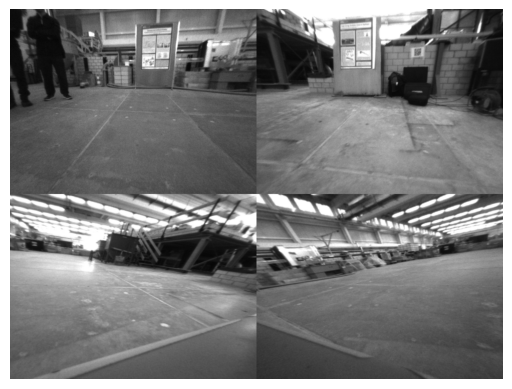

In [41]:
img_fl = map_ds[0]["img_sensor"]['spot_2023-11-24-10-53/spot-camera-left-image'].image.permute(1, 2, 0)
img_fr = map_ds[0]["img_sensor"]['spot_2023-11-24-10-53/spot-camera-frontleft-image'].image.permute(1, 2, 0)
img_l = map_ds[0]["img_sensor"]['spot_2023-11-24-10-53/spot-camera-right-image'].image.permute(1, 2, 0)
img_r = map_ds[0]["img_sensor"]['spot_2023-11-24-10-53/spot-camera-frontright-image'].image.permute(1, 2, 0)

snapshot = torch.cat(
    [torch.cat([img_fl, img_fr]), torch.cat([img_l, img_r])], dim=1
)

plt.imshow(snapshot); plt.axis("off")
plt.show()

## hololens 

### map 

In [4]:
root = "/media/jbhayet/Data/datasets/crocodl-dataset/capture/HYDRO/sessions"  # contains ios_map/ and ios_query/
tfm = T.Compose([T.Resize((480, 640)), T.ToTensor()])

map_ds = HLMapDataset(root, transform=tfm, subsession="hl_2023-11-24-10-16-27-889.002")

In [5]:
print(map_ds.idx.subsessions)

['hl_2023-11-24-10-16-27-889.002', 'hl_2023-11-24-10-20-36-033.002', 'hl_2023-11-24-10-20-36-033.008', 'hl_2023-11-24-10-31-32-402.000', 'hl_2024-05-17-12-04-34-611.000', 'hl_2024-05-17-12-09-03-800.000', 'hl_2024-05-17-12-09-03-800.006', 'hl_2024-05-17-12-09-03-800.010', 'hl_2024-05-17-12-15-02-126.000', 'hl_2024-05-17-12-15-54-676.000', 'hl_2024-05-17-12-23-34-696.000', 'hl_2024-05-17-12-25-27-576.000', 'hl_2024-05-17-12-25-27-576.001', 'hl_2024-05-17-12-25-27-576.005', 'hl_2024-05-17-12-25-27-576.019', 'hl_2024-05-17-12-33-50-091.000', 'hl_2024-05-17-12-33-50-091.004', 'hl_2024-05-17-12-51-04-304.001', 'hl_2024-05-17-12-51-04-304.015', 'hl_2024-05-17-13-11-13-385.002', 'hl_2024-05-17-13-21-07-265.000', 'hl_2024-05-17-13-36-04-371.001', 'hl_2024-05-17-13-36-04-371.004', 'hl_2024-05-17-13-36-04-371.005', 'hl_2024-05-17-13-36-04-371.043', 'hl_2024-05-17-14-18-26-058.004', 'hl_2024-05-17-14-37-52-314.000']


In [6]:
len(map_ds)

52

In [7]:
map_ds[0].keys()

dict_keys(['split', 'subsession', 'timestamp', 'dev_id', 'img_sensor', 'Twc', 'Tcw', 'cov6x6'])

In [8]:
map_ds[0]["Twc"]

tensor([[-2.1247e-01,  3.0059e-01,  9.2979e-01,  3.7325e+01],
        [ 4.5027e-02,  9.5351e-01, -2.9797e-01,  1.3458e+01],
        [-9.7613e-01, -2.1444e-02, -2.1613e-01, -5.9074e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)

In [14]:
map_ds[11]["img_sensor"].keys()

dict_keys(['hl_2023-11-24-10-16-27-889.002/hetlf', 'hl_2023-11-24-10-16-27-889.002/hetrf', 'hl_2023-11-24-10-16-27-889.002/hetrr', 'hl_2023-11-24-10-16-27-889.002/hetll'])

In [16]:
map_ds[0]["img_sensor"]['hl_2023-11-24-10-16-27-889.002/hetlf'].Trs

tensor([[ 3.6861e-06,  1.0000e+00,  4.8048e-04, -2.2204e-16],
        [-1.0000e+00,  3.8863e-06, -4.1665e-04,  0.0000e+00],
        [-4.1665e-04, -4.8048e-04,  1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)

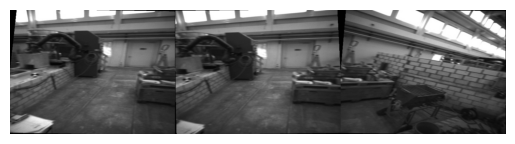

In [18]:
img_lf = map_ds[0]["img_sensor"]['hl_2023-11-24-10-16-27-889.002/hetlf'].img.permute(1, 2, 0)
img_rf = map_ds[0]["img_sensor"]['hl_2023-11-24-10-16-27-889.002/hetrf'].img.permute(1, 2, 0)
img_rr = map_ds[0]["img_sensor"]['hl_2023-11-24-10-16-27-889.002/hetrr'].img.permute(1, 2, 0)


snapshot = torch.cat([img_lf, img_rf, img_rr], axis=1)

plt.imshow(snapshot); plt.axis("off")
plt.show()

## ios 

### map 

In [21]:
root = "/media/jbhayet/Data/datasets/crocodl-dataset/capture/HYDRO/sessions"  # contains ios_map/ and ios_query/
tfm = T.Compose([T.Resize((480, 640)), T.ToTensor()])

map_ds = IOSMapDataset(root, transform=tfm, subsession="ios_2023-10-27_10.20.23_000")

In [22]:
print(f"subsessions:\n{map_ds.idx.subsessions}")

subsessions:
['ios_2023-10-27_10.20.23_000', 'ios_2023-10-27_10.27.17_000', 'ios_2023-10-27_10.29.00_000', 'ios_2023-10-27_11.38.32_000', 'ios_2023-10-27_11.46.47_000', 'ios_2023-10-27_11.58.55_000', 'ios_2024-05-17_15.24.59_000']


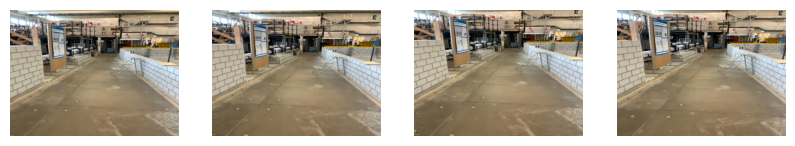

In [5]:
fig = plt.figure(figsize=(10, 10))
for i, img in enumerate(imgs):
    plt.subplot(1, 4, i + 1); 
    plt.imshow(img.permute(1, 2, 0))
    plt.axis("off")


In [6]:
print(Twc_list)

[tensor([[ 2.2441e-01,  2.6200e-01, -9.3862e-01,  2.7926e+01],
        [ 9.7447e-01, -5.2880e-02,  2.1822e-01, -2.5139e+01],
        [ 7.5394e-03, -9.6362e-01, -2.6717e-01, -8.6350e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64), tensor([[ 2.2552e-01,  2.7399e-01, -9.3492e-01,  2.7914e+01],
        [ 9.7417e-01, -5.2010e-02,  2.1975e-01, -2.5143e+01],
        [ 1.1583e-02, -9.6033e-01, -2.7864e-01, -8.6368e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64), tensor([[ 2.3147e-01,  3.0339e-01, -9.2433e-01,  2.7818e+01],
        [ 9.7283e-01, -7.6355e-02,  2.1856e-01, -2.5156e+01],
        [-4.2703e-03, -9.4980e-01, -3.1282e-01, -8.6541e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64), tensor([[ 2.2738e-01,  2.9787e-01, -9.2713e-01,  2.7572e+01],
        [ 9.7377e-01, -6.0982e-02,  2.1922e-01, -2.5062e+01],
        [ 8.7623e-03, -9.5266e-01, -3.039

In [4]:
print(split); print(subsession); print(timestamp); print(sensor_id); print(path)

['map', 'map', 'map', 'map']
['ios_2023-10-27_10.20.23_000', 'ios_2023-10-27_10.20.23_000', 'ios_2023-10-27_10.20.23_000', 'ios_2023-10-27_10.20.23_000']
[594450497982, 594451097721, 594451697461, 594452297200]
['ios_2023-10-27_10.20.23_000/cam_phone_594450497982', 'ios_2023-10-27_10.20.23_000/cam_phone_594451097721', 'ios_2023-10-27_10.20.23_000/cam_phone_594451697461', 'ios_2023-10-27_10.20.23_000/cam_phone_594452297200']
['/media/jbhayet/Data/datasets/crocodl-dataset/capture/HYDRO/sessions/ios_map/raw_data/ios_2023-10-27_10.20.23_000/images/594450497982.jpg', '/media/jbhayet/Data/datasets/crocodl-dataset/capture/HYDRO/sessions/ios_map/raw_data/ios_2023-10-27_10.20.23_000/images/594451097721.jpg', '/media/jbhayet/Data/datasets/crocodl-dataset/capture/HYDRO/sessions/ios_map/raw_data/ios_2023-10-27_10.20.23_000/images/594451697461.jpg', '/media/jbhayet/Data/datasets/crocodl-dataset/capture/HYDRO/sessions/ios_map/raw_data/ios_2023-10-27_10.20.23_000/images/594452297200.jpg']


### DINOv3 

In [7]:
import torch
import torchvision.transforms as transforms 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import numpy as np 

from utils.dataset import IOSMapDataset, collate_map

In [8]:
# load model 
REPO_DIR = "submodules/dinov3"
weights = "/media/jbhayet/Data/datasets/croco-experiments/checkpoints/dinov3_vitb16.pth"

# DINOv3 ViT models pretrained on web images
dinov3_vitb16 = torch.hub.load(
    REPO_DIR, 'dinov3_vitb16', source='local', weights=weights
).to("cuda:0")
print(f"Model num features: {dinov3_vitb16.num_features}")

Model num features: 768


In [9]:
from torchinfo import summary

summary(dinov3_vitb16, input_size=(1, 3, 224, 224), col_names=("input_size","output_size","num_params","kernel_size"))

Layer (type:depth-idx)                        Input Shape               Output Shape              Param #                   Kernel Shape
DinoVisionTransformer                         [1, 3, 224, 224]          [1, 768]                  4,608                     --
├─PatchEmbed: 1-1                             [1, 3, 224, 224]          [1, 14, 14, 768]          --                        --
│    └─Conv2d: 2-1                            [1, 3, 224, 224]          [1, 768, 14, 14]          590,592                   [16, 16]
│    └─Identity: 2-2                          [1, 196, 768]             [1, 196, 768]             --                        --
├─RopePositionEmbedding: 1-2                  --                        [196, 64]                 --                        --
├─ModuleList: 1-25                            --                        --                        (recursive)               --
│    └─SelfAttentionBlock: 2-3                [1, 201, 768]             [1, 201, 768]          

In [10]:
# preprocessing function 
def make_transform(resize_size: int = 224):
    to_tensor = transforms.ToTensor()
    resize = transforms.Resize((resize_size, resize_size), antialias=True)
    normalize = transforms.Normalize(
        mean=(0.430, 0.411, 0.296),
        std=(0.213, 0.156, 0.143),
    )
    return transforms.Compose([to_tensor, resize, normalize])

tfm = make_transform()

In [11]:
# load dataset 
root = "/media/jbhayet/Data/datasets/crocodl-dataset/capture/HYDRO/sessions"  # contains ios_map/ and ios_query/
map_ds = IOSMapDataset(root, transform=tfm)
map_loader = DataLoader(map_ds, batch_size=4, shuffle=False, collate_fn=collate_map)
map_batch = next(iter(map_loader))

imgs = map_batch["image"].to("cuda")      # (B,3,H,W)

In [12]:
with torch.no_grad():
    img_feats = dinov3_vitb16.get_intermediate_layers(imgs, reshape=True)[0]

In [13]:
with torch.no_grad():
    imgs_embed = dinov3_vitb16(imgs)

In [14]:
img_feats.shape, imgs_embed.shape

(torch.Size([4, 768, 14, 14]), torch.Size([4, 768]))

In [15]:
# upsample feats to image size 
size = (imgs[0].shape[-2], imgs[0].shape[-1])
feat_up = torch.nn.functional.interpolate(
    input=img_feats, size=size, mode="bilinear", align_corners=False 
)

In [16]:
feat_up.shape

torch.Size([4, 768, 224, 224])

In [ ]:
# plot 
_, _, h, w = feat_up.shape
feat_pca = feat_up[0].permute((1,2,0))
projected_featmap = feat_pca.reshape(-1, feat_pca.shape[-1]).cpu()

pca = PCA(n_components=3)
pca.fit(projected_featmap)
pca_features = pca.transform(projected_featmap)
pca_features = (pca_features - pca_features.min()) / (pca_features.max() - pca_features.min())
pca_features = pca_features * 255
pca_features = pca_features.reshape(h, w, 3).astype(np.uint8)

fig = plt.figure(figsize=(5, 5))
plt.imshow(pca_features); plt.show()

# megaloc embeddings

In [23]:
import numpy as np 
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt

from utils.pose_utils import parse_trajectories_txt


### megaloc spot embeddings 

In [34]:
embeds = np.load("data/embeddings/HYDRO/spot_2023-11-24-11-26/spot_2023-11-24-11-26.npy")
manifest = pd.read_csv("data/embeddings/HYDRO/spot_2023-11-24-11-26/manifest.csv")
traj_path = "/media/jbhayet/Data/datasets/crocodl-dataset/capture/HYDRO/sessions/spot_map/trajectories.txt"
traj = parse_trajectories_txt(traj_path)

print(embeds.shape)
manifest.head()

(5036, 8448)


,row_index,device_id,sensor_id,timestamp,abs_path
0,0,spot_2023-11-24-11-26/1700821615164836-body,spot_2023-11-24-11-26/spot-camera-frontleft-image,1700821615164836,/media/jbhayet/Data/datasets/crocodl-dataset/c...
1,1,spot_2023-11-24-11-26/1700821615164836-body,spot_2023-11-24-11-26/spot-camera-frontright-i...,1700821615164836,/media/jbhayet/Data/datasets/crocodl-dataset/c...
2,2,spot_2023-11-24-11-26/1700821615164836-body,spot_2023-11-24-11-26/spot-camera-left-image,1700821615164836,/media/jbhayet/Data/datasets/crocodl-dataset/c...
3,3,spot_2023-11-24-11-26/1700821615164836-body,spot_2023-11-24-11-26/spot-camera-right-image,1700821615164836,/media/jbhayet/Data/datasets/crocodl-dataset/c...
4,4,spot_2023-11-24-11-26/1700821615619748-body,spot_2023-11-24-11-26/spot-camera-frontleft-image,1700821615619748,/media/jbhayet/Data/datasets/crocodl-dataset/c...


In [62]:
traj_dev_pose = {trj.device_id: [trj.q, trj.t] for trj in traj}

In [70]:
sync_quats = [
    traj_dev_pose[row["device_id"]][0]
    for _, row in manifest.iterrows()
]
sync_t = [
    traj_dev_pose[row["device_id"]][1]
    for _, row in manifest.iterrows()
]


In [72]:
import umap
import numpy as np
import matplotlib.pyplot as plt

# Create the UMAP reducer
reducer = umap.UMAP(
    n_neighbors=15,        # controls local vs global structure
    min_dist=0.1,          # controls tightness of clusters
    n_components=2,        # we want 2D visualization
    metric='cosine',       # good for embeddings
    random_state=42
)

# Compute the reduced embedding
embedding_2d = reducer.fit_transform(embeds)


/home/sergio/anaconda3/envs/vision/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


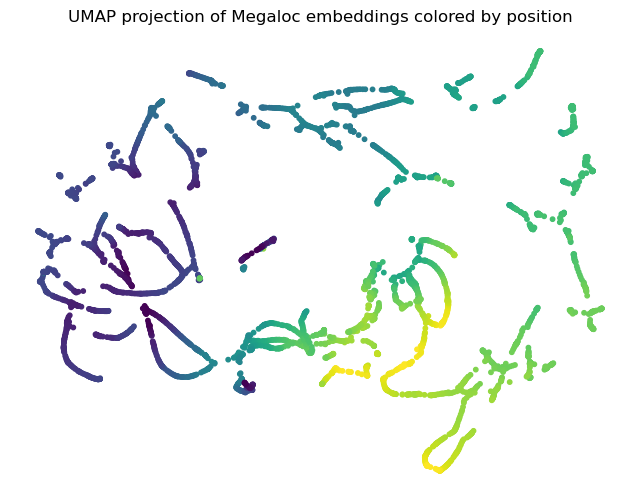

In [78]:
trans = np.stack(sync_t)

# # 1. colors by pose 
# pos_norm = (pos - pos.min(0)) / (pos.max(0) - pos.min(0))
# colors = pos_norm  # interpret as RGB

# 2. colors by z 
z = trans[:, 1]  # or x, depending on direction of motion
z_norm = (z - z.min()) / (z.max() - z.min())
colors = plt.cm.viridis(z_norm)


plt.figure(figsize=(8,6))
plt.scatter(embedding_2d[:,0], embedding_2d[:,1], c=colors, s=10)
plt.title("UMAP projection of Megaloc embeddings colored by position")
plt.axis("off")
plt.show()